<a href="https://colab.research.google.com/github/Trieu1020/baitapAI1/blob/main/AI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.1 MB/s eta 0:00:00


Thời gian dự kiến: 30.54222222222215
Tiền thưởng: 51.66666666666667
Đánh giá: 0.9037037037037037


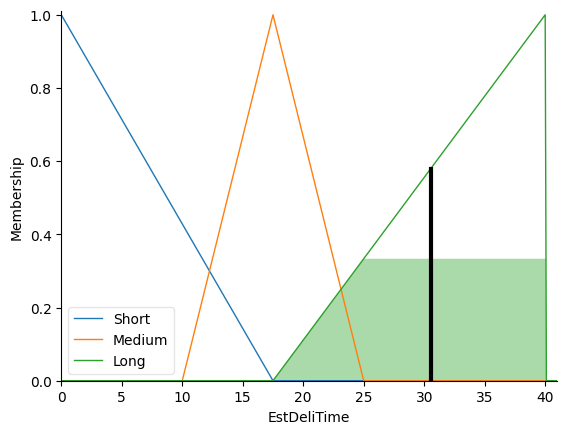

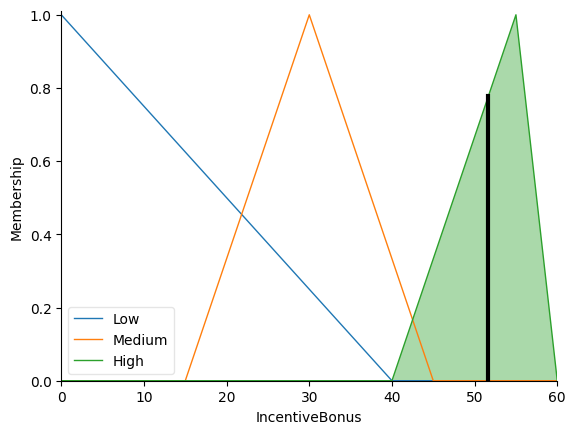

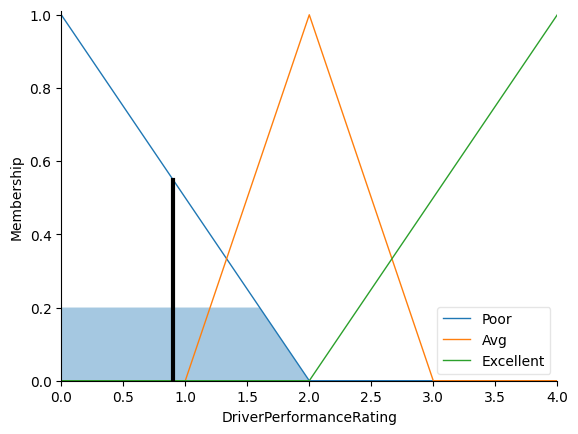

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


TrafficCond = ctrl.Antecedent(np.arange(0,11,1),'TrafficCond')
DistToCustomer = ctrl.Antecedent(np.arange(0,16.1,0.1),'DistToCustomer')
WeatherCond = ctrl.Antecedent(np.arange(0,3,1),'WeatherCond')
OrderPrepTime = ctrl.Antecedent(np.arange(0,26.1,0.1),'OrderPrepTime')
DriverFatigueLvl = ctrl.Antecedent(np.arange(0,11,1),'DriverFatigueLvl')

EstDeliTime = ctrl.Consequent(np.arange(0,41.1,0.1),'EstDeliTime')
IncentiveBonus = ctrl.Consequent(np.arange(0,61,1),'IncentiveBonus')
DriverPerformanceRating = ctrl.Consequent(np.arange(0,5,1),'DriverPerformanceRating')


TrafficCond['Low'] = fuzz.trimf(TrafficCond.universe,[0,0,5])
TrafficCond['Medium'] = fuzz.trimf(TrafficCond.universe,[2.5,5,7.5])
TrafficCond['High'] = fuzz.trimf(TrafficCond.universe,[5,10,10])

DistToCustomer['Short'] = fuzz.trimf(DistToCustomer.universe,[0,0,5.5])
DistToCustomer['Medium'] = fuzz.trimf(DistToCustomer.universe,[3,5.5,8])
DistToCustomer['Long'] = fuzz.trimf(DistToCustomer.universe,[5.5,16,16])

WeatherCond['Clear'] = fuzz.trimf(WeatherCond.universe,[0,0,1])
WeatherCond['Rainy'] = fuzz.trimf(WeatherCond.universe,[0,1,2])
WeatherCond['Stormy'] = fuzz.trimf(WeatherCond.universe,[1,2,2])

OrderPrepTime['Fast'] = fuzz.trimf(OrderPrepTime.universe,[0,0,10])
OrderPrepTime['Medium'] = fuzz.trimf(OrderPrepTime.universe,[5,10,15])
OrderPrepTime['Slow'] = fuzz.trimf(OrderPrepTime.universe,[10,26,26])

DriverFatigueLvl['Low'] = fuzz.trimf(DriverFatigueLvl.universe,[0,0,5])
DriverFatigueLvl['Medium'] = fuzz.trimf(DriverFatigueLvl.universe,[2.5,5,7.5])
DriverFatigueLvl['High'] = fuzz.trimf(DriverFatigueLvl.universe,[5,10,10])

EstDeliTime['Short'] = fuzz.trimf(EstDeliTime.universe,[0,0,17.5])
EstDeliTime['Medium'] = fuzz.trimf(EstDeliTime.universe,[10,17.5,25])
EstDeliTime['Long'] = fuzz.trimf(EstDeliTime.universe,[17.5,40,40])

IncentiveBonus['Low'] = fuzz.trimf(IncentiveBonus.universe,[0,0,40])
IncentiveBonus['Medium'] = fuzz.trimf(IncentiveBonus.universe,[15,30,45])
IncentiveBonus['High'] = fuzz.trimf(IncentiveBonus.universe,[40,55,60])

DriverPerformanceRating['Poor'] = fuzz.trimf(DriverPerformanceRating.universe,[0,0,2])
DriverPerformanceRating['Avg'] = fuzz.trimf(DriverPerformanceRating.universe,[1,2,3])
DriverPerformanceRating['Excellent'] = fuzz.trimf(DriverPerformanceRating.universe,[2,4,4])

rule1 = ctrl.Rule(TrafficCond['Low']&DistToCustomer['Short'],EstDeliTime['Short'])
rule2 = ctrl.Rule(TrafficCond['Medium']&DistToCustomer['Medium'],EstDeliTime['Medium'])
rule3 = ctrl.Rule(TrafficCond['High']&DistToCustomer['Long'],EstDeliTime['Long'])
rule4 = ctrl.Rule(WeatherCond['Clear']&TrafficCond['Low'],IncentiveBonus['Low'])
rule5 = ctrl.Rule(WeatherCond['Rainy']&TrafficCond['Medium'],IncentiveBonus['Medium'])
rule6 = ctrl.Rule(WeatherCond['Stormy']&TrafficCond['High'],IncentiveBonus['High'])
rule7 = ctrl.Rule(OrderPrepTime['Fast']&TrafficCond['Low'],EstDeliTime['Short'])
rule8 = ctrl.Rule(OrderPrepTime['Medium']&TrafficCond['Medium'],EstDeliTime['Medium'])
rule9 = ctrl.Rule(OrderPrepTime['Slow']&TrafficCond['High'],EstDeliTime['Long'])
rule10 = ctrl.Rule(DriverFatigueLvl['Low']&WeatherCond['Clear'],DriverPerformanceRating['Excellent'])
rule11 = ctrl.Rule(DriverFatigueLvl['Medium']&WeatherCond['Rainy'],DriverPerformanceRating['Avg'])
rule12 = ctrl.Rule(DriverFatigueLvl['High']&WeatherCond['Stormy'],DriverPerformanceRating['Poor'])
rule13 = ctrl.Rule(DistToCustomer['Long']&WeatherCond['Stormy']&TrafficCond['High'],(EstDeliTime['Long'],IncentiveBonus['High']))
rule14 = ctrl.Rule(DistToCustomer['Short']&WeatherCond['Clear']&TrafficCond['Low'],(EstDeliTime['Short'],IncentiveBonus['Low']))
rule15 = ctrl.Rule(DriverFatigueLvl['High']&TrafficCond['High'],(DriverPerformanceRating['Poor'],EstDeliTime['Long']))

control_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule13,rule14,rule15])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['TrafficCond'] = 10
fuzzy_system.input['WeatherCond'] = 2
fuzzy_system.input['DistToCustomer'] = 9
fuzzy_system.input['OrderPrepTime'] = 15
fuzzy_system.input['DriverFatigueLvl'] = 6

fuzzy_system.compute()

print('Thời gian dự kiến:',fuzzy_system.output['EstDeliTime'])
print('Tiền thưởng:',fuzzy_system.output['IncentiveBonus'])
print('Đánh giá:',fuzzy_system.output['DriverPerformanceRating'])
EstDeliTime.view(sim=fuzzy_system)
IncentiveBonus.view(sim=fuzzy_system)
DriverPerformanceRating.view(sim=fuzzy_system)